# Data Analysis and Visualization Final Project

## Imports

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import dash
import plotly.express as px
from dash import dcc, html

In [214]:
pd.options.display.float_format = '{:.2f}'.format

## Data exploration & Preprocessing

In [215]:
df = pd.read_csv('Datasets/10000 Sales Records (1).csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


### Changing 'Object' data types to 'Category' to save memory

In [217]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')

### Data exploration

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,10000.00,549871874.37,260783511.13,100089156.00,321806669.00,548566305.00,775998103.50,999934232.00
Units Sold,10000.00,5002.86,2873.25,2.00,2530.75,4962.00,7472.00,10000.00
Unit Price,10000.00,268.14,217.94,9.33,109.28,205.70,437.20,668.27
Unit Cost,10000.00,188.81,176.45,6.92,56.67,117.11,364.69,524.96
Total Revenue,10000.00,1333355.13,1465026.17,167.94,288551.08,800051.21,1819143.39,6680026.92
Total Cost,10000.00,938265.78,1145914.07,124.56,164785.53,481605.84,1183821.52,5241725.60
Total Profit,10000.00,395089.35,377554.96,43.38,98329.14,289099.02,566422.71,1738178.39


In [219]:
df.duplicated().sum()

np.int64(0)

In [220]:
df['Region'].unique()

['Sub-Saharan Africa', 'Europe', 'Middle East and North Africa', 'Asia', 'Central America and the Caribbean', 'Australia and Oceania', 'North America']
Categories (7, object): ['Asia', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Middle East and North Africa', 'North America', 'Sub-Saharan Africa']

In [221]:
df['Region'].value_counts()

Region
Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: count, dtype: int64

In [222]:
len(df['Country'].unique())

185

In [223]:
df['Item Type'].unique()

['Office Supplies', 'Beverages', 'Vegetables', 'Household', 'Baby Food', ..., 'Clothes', 'Snacks', 'Personal Care', 'Cosmetics', 'Fruits']
Length: 12
Categories (12, object): ['Baby Food', 'Beverages', 'Cereal', 'Clothes', ..., 'Office Supplies', 'Personal Care', 'Snacks', 'Vegetables']

In [224]:
df['Sales Channel'].unique()

['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']

In [225]:
df['Order Priority'].unique()

['L', 'C', 'H', 'M']
Categories (4, object): ['C', 'H', 'L', 'M']

**Comparing order date and shipping date**

In [226]:
print(f"Earliest order was placed on: {min(sorted(df['Order Date'].unique()))}")
print(f"Earliest order was shipped on: {min(sorted(df['Ship Date'].unique()))}")
print(f"Latest order was places on: {max(sorted(df['Order Date'].unique()))}")
print(f"Latest order was shipped on: {max(sorted(df['Ship Date'].unique()))}")
#Order shipped after a year?

Earliest order was placed on: 1/1/2010
Earliest order was shipped on: 1/1/2011
Latest order was places on: 9/9/2016
Latest order was shipped on: 9/9/2017


### Changing the format
Changed the format to be able to sort them

In [227]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [228]:
print(f"Earliest order was placed on: {min(sorted(df['Order Date'].unique()))}")
print(f"Earliest order was shipped on: {min(sorted(df['Ship Date'].unique()))}")
print(f"Latest order was places on: {max(sorted(df['Order Date'].unique()))}")
print(f"Latest order was shipped on: {max(sorted(df['Ship Date'].unique()))}")

Earliest order was placed on: 2010-01-01 00:00:00
Earliest order was shipped on: 2010-01-05 00:00:00
Latest order was places on: 2017-07-28 00:00:00
Latest order was shipped on: 2017-09-10 00:00:00


In [229]:
df[df['Order Date'] == '2010-01-01']

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
4535,Sub-Saharan Africa,Central African Republic,Vegetables,Online,H,2010-01-01,506209075,2010-02-04,7369,154.06,90.93,1135268.14,670063.17,465204.97
5104,Asia,China,Cereal,Online,C,2010-01-01,863776719,2010-02-10,9581,205.70,117.11,1970811.70,1122030.91,848780.79


In [230]:
df[df['Ship Date'] == '2011-01-01']

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
800,Middle East and North Africa,Oman,Clothes,Offline,H,2010-12-10,747232377,2011-01-01,1520,109.28,35.84,166105.60,54476.80,111628.80
3449,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2010-12-07,965905368,2011-01-01,1718,109.28,35.84,187743.04,61573.12,126169.92
9545,Asia,North Korea,Beverages,Online,C,2010-12-20,397891604,2011-01-01,3823,47.45,31.79,181401.35,121533.17,59868.18


## Visualization and Insights

### Top 5 Countries in Sales
* From here we can say that the top 5 countries are
    1. Afghanistan, with profit: **$22,977,020.06**
    2. Algeria, with profit: **$22,125,886.64**
    3. Angola, with profit: **$19,596,150.58**
    4. Albania, with profit: **$19,583,969.70**
    5. Andorra, with profit: **$16,653,936.87**

In [397]:
# Get highest 5 countires in Profit
top_5 = df.groupby('Country')['Total Profit'].sum().head().sort_values(ascending=False)
top_5

Country
Afghanistan   22977020.06
Algeria       22125886.64
Angola        19596150.58
Albania       19583969.70
Andorra       16653936.87
Name: Total Profit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

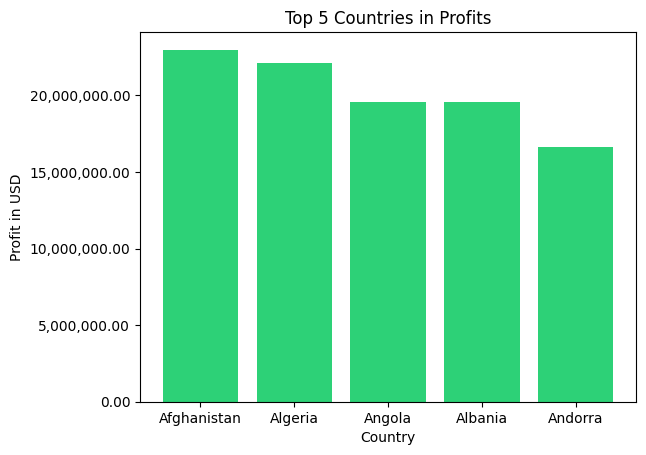

In [ ]:
plt.title('Top 5 Countries in Profits')
plt.xlabel('Country')
plt.ylabel('Profit in USD')
plt.bar(top_5.index, top_5.values, color="#2dd177")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show

### Profit Based on Item Type
* The most sold item type is household products

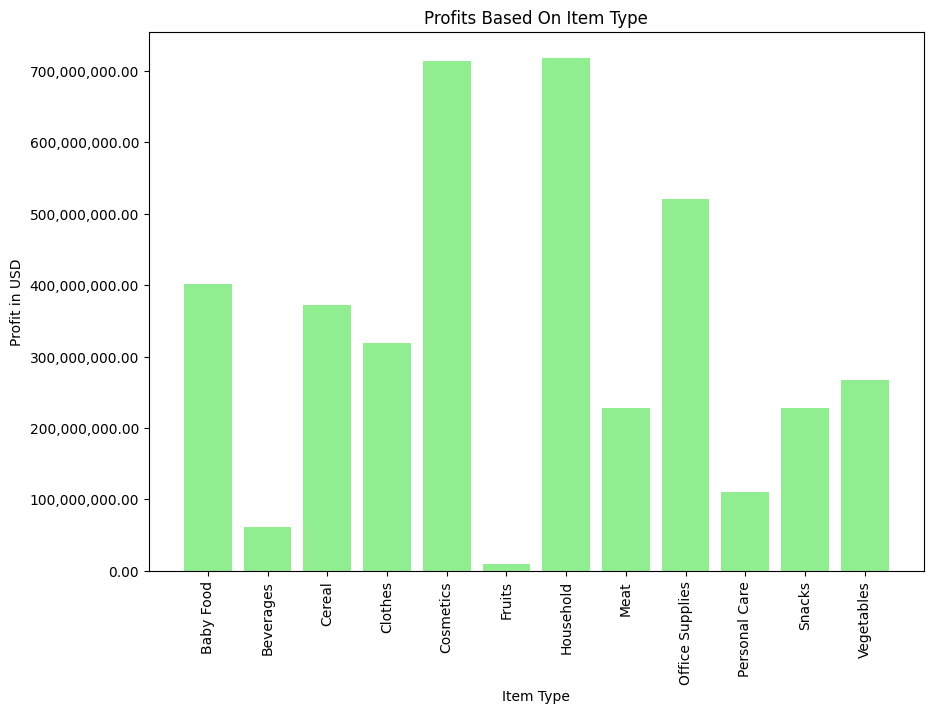

In [ ]:
item_profit = df.groupby('Item Type')['Total Profit'].sum()
plt.figure(figsize=(10, 7))
plt.bar(item_profit.index, item_profit.values, color='lightgreen')
plt.title('Profits Based On Item Type')
plt.ylabel('Profit in USD')
plt.xlabel('Item Type')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### Profit Per Region
* The region with the highest profit is Europ

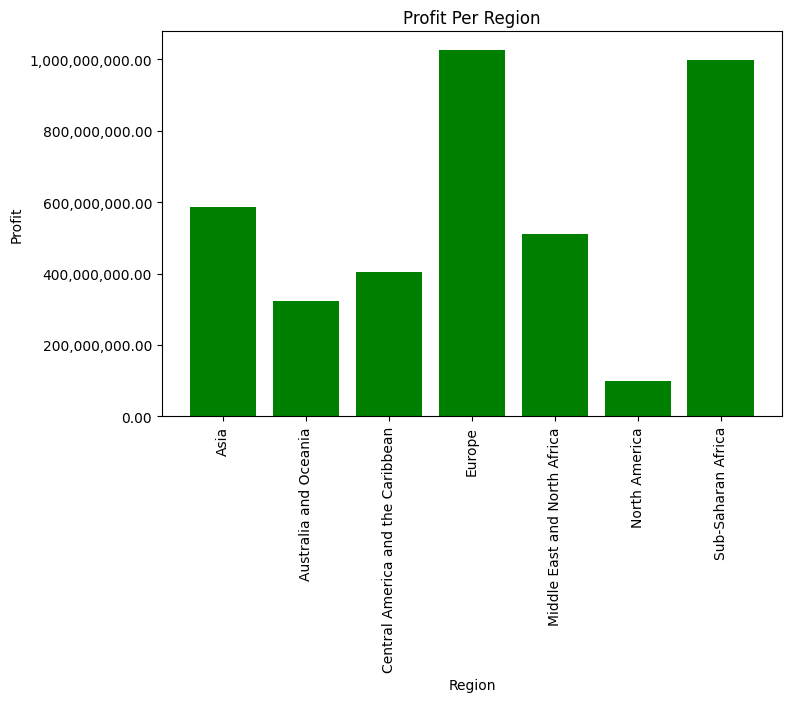

In [ ]:
profits_per_region = df.groupby('Region')['Total Profit'].sum()
plt.figure(figsize=(8, 5))
plt.bar(profits_per_region.index, profits_per_region.values, color='green')
plt.title('Profit Per Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### Profit over the years
* Profit was stable till 2015, after that it started to deteriorate

In [ ]:
df['Order Year'] = df['Order Date'].dt.year

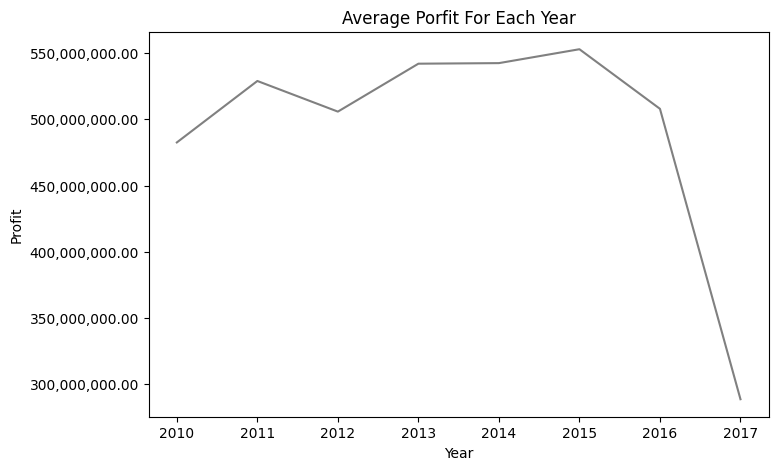

In [ ]:
avg_profit_per_year = df.groupby('Order Year')['Total Profit'].sum()
plt.figure(figsize=(8, 5))
plt.plot(avg_profit_per_year.index, avg_profit_per_year.values, color='gray')
plt.title('Average Porfit For Each Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()


### Categories Sold Based on Region
Shows which of the 12 categories listed was mostly sold in each of the 7 regions in the dataset

In [348]:
types_sold_based_on_region = df.groupby(['Region', 'Item Type'])['Units Sold'].sum()

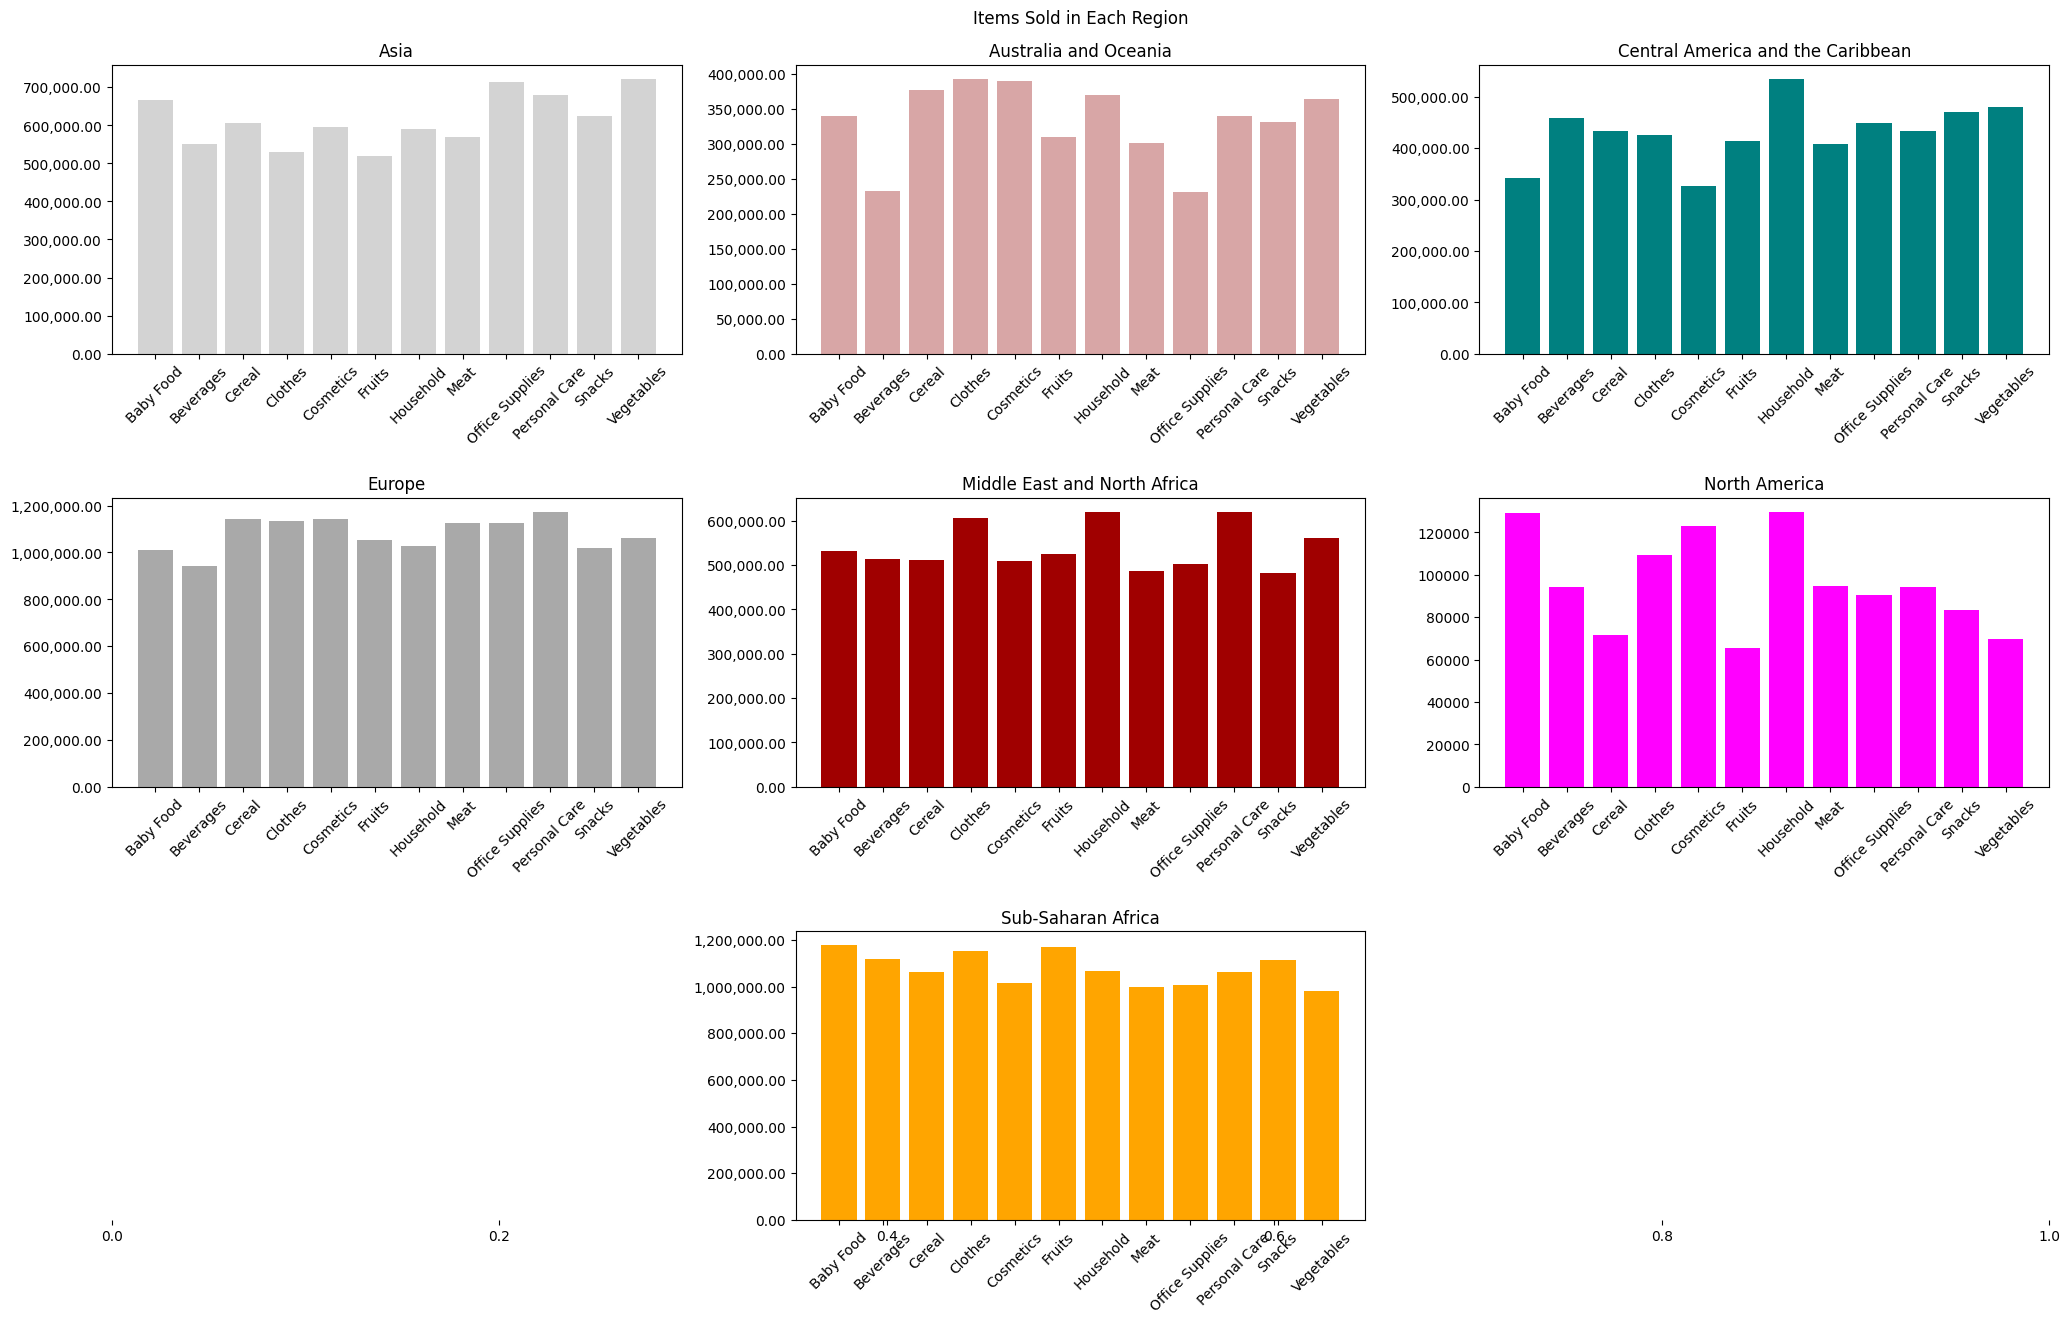

In [400]:
plt.figure(figsize=(25, 15))
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.5)
plt.title('Items Sold in Each Region', pad=30)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 1)
plt.title('Asia')
plt.xticks(rotation=45)
region_sales = types_sold_based_on_region['Asia']
plt.bar(region_sales.index, region_sales.values, color = 'lightgray')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 2)
plt.title('Australia and Oceania')
region_sales = types_sold_based_on_region['Australia and Oceania']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = '#d8a6a6')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 3)
plt.title('Central America and the Caribbean')
region_sales = types_sold_based_on_region['Central America and the Caribbean']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = 'teal')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 4)
plt.title('Europe')
region_sales = types_sold_based_on_region['Europe']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = 'darkgray')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 5)
plt.title('Middle East and North Africa')
region_sales = types_sold_based_on_region['Middle East and North Africa']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = '#a00000')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.subplot(3, 3, 6)
plt.title('North America')
region_sales = types_sold_based_on_region['North America']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = 'magenta')

plt.subplot(3, 3, 8)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Sub-Saharan Africa')
region_sales = types_sold_based_on_region['Sub-Saharan Africa']
plt.xticks(rotation=45)
plt.bar(region_sales.index, region_sales.values, color = 'orange')

plt.show()

### Sales Over The Years Dashboard

In [450]:
app = dash.Dash(__name__)

In [451]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Year'],
      dtype='object')

In [452]:
app.layout = html.Div([
    html.H1("Sales Dashboard"),

    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': r, 'value': r} for r in df['Region'].sort_values().unique()],
        value='Asia'
    ),

    dcc.Graph(id='line-plot')
])

@app.callback(
    dash.Output('line-plot', 'figure'),
    [dash.Input('region-dropdown', 'value')]
)
def update_chart(region):
    filtered_data = df[df['Region'] == region]

    fig = px.bar(
        filtered_data,
        x='Order Year',
        y='Units Sold',
        color='Item Type',
        animation_frame='Item Type',
        title=f"Sales Across The Years for {region}"
    )

    fig.update_layout(
        xaxis_title="Order Year",
        yaxis_title="Units Sold",
        legend_title="Item Type"
    )

    return fig

In [454]:
app.run()